In [2507]:
import os
import random
import numpy as np
import pandas as pd # type: ignore
import tensorflow as tf # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(42) # type: ignore

In [2508]:
df = pd.read_csv('Bank Marketing.csv')
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes


# EDA

In [2509]:
def data_info(data):
    cols=[]
    unique_val=[]
    n_uniques=[]
    dtypes=[]
    nulls=[]
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        n_uniques.append(data[col].nunique())
        unique_val.append(data[col].unique())
        nulls.append(data[col].isna().sum())
        
    return pd.DataFrame({"Col":cols,"dtype":dtypes,"n_uniques":n_uniques,"Unique Values":unique_val,"Nulls":nulls})

In [2510]:
data_info(df)

,Col,dtype,n_uniques,Unique Values,Nulls
0,age,int64,75,"[49, 37, 78, 36, 59, 29, 26, 30, 50, 33, 44, 3...",0
1,job,object,12,"[blue-collar, entrepreneur, retired, admin., s...",0
2,marital,object,4,"[married, divorced, single, unknown]",0
3,education,object,8,"[basic.9y, university.degree, basic.4y, high.s...",0
4,default,object,3,"[unknown, no, yes]",0
5,housing,object,3,"[no, yes, unknown]",0
6,loan,object,3,"[no, yes, unknown]",0
7,contact,object,2,"[cellular, telephone]",0
8,month,object,10,"[nov, jul, may, jun, aug, mar, oct, apr, sep, ...",0
9,day_of_week,object,5,"[wed, mon, tue, fri, thu]",0


## Change Object to Category

In [2511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [2512]:
df[df.select_dtypes('object').columns] = df.select_dtypes('object').astype('category')

In [2513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32950 non-null  int64   
 1   job          32950 non-null  category
 2   marital      32950 non-null  category
 3   education    32950 non-null  category
 4   default      32950 non-null  category
 5   housing      32950 non-null  category
 6   loan         32950 non-null  category
 7   contact      32950 non-null  category
 8   month        32950 non-null  category
 9   day_of_week  32950 non-null  category
 10  duration     32950 non-null  int64   
 11  campaign     32950 non-null  int64   
 12  pdays        32950 non-null  int64   
 13  previous     32950 non-null  int64   
 14  poutcome     32950 non-null  category
 15  y            32950 non-null  category
dtypes: category(11), int64(5)
memory usage: 1.6 MB


## Check to Duplicates

In [2514]:
df.duplicated().sum()

8

In [2515]:
df = df.drop_duplicates()

In [2516]:
df.duplicated().sum()

0

In [2517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32942 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32942 non-null  int64   
 1   job          32942 non-null  category
 2   marital      32942 non-null  category
 3   education    32942 non-null  category
 4   default      32942 non-null  category
 5   housing      32942 non-null  category
 6   loan         32942 non-null  category
 7   contact      32942 non-null  category
 8   month        32942 non-null  category
 9   day_of_week  32942 non-null  category
 10  duration     32942 non-null  int64   
 11  campaign     32942 non-null  int64   
 12  pdays        32942 non-null  int64   
 13  previous     32942 non-null  int64   
 14  poutcome     32942 non-null  category
 15  y            32942 non-null  category
dtypes: category(11), int64(5)
memory usage: 1.9 MB


In [2518]:
df = df.reset_index(drop=True)

In [2519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32942 entries, 0 to 32941
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32942 non-null  int64   
 1   job          32942 non-null  category
 2   marital      32942 non-null  category
 3   education    32942 non-null  category
 4   default      32942 non-null  category
 5   housing      32942 non-null  category
 6   loan         32942 non-null  category
 7   contact      32942 non-null  category
 8   month        32942 non-null  category
 9   day_of_week  32942 non-null  category
 10  duration     32942 non-null  int64   
 11  campaign     32942 non-null  int64   
 12  pdays        32942 non-null  int64   
 13  previous     32942 non-null  int64   
 14  poutcome     32942 non-null  category
 15  y            32942 non-null  category
dtypes: category(11), int64(5)
memory usage: 1.6 MB


## Drop unnecessary columns

In [2520]:
df.sample(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1487,29,admin.,married,university.degree,no,no,no,cellular,may,wed,128,2,999,0,nonexistent,no
28311,56,housemaid,married,basic.9y,unknown,no,no,cellular,aug,thu,180,3,999,0,nonexistent,no


In [2521]:
cols_to_drop = ['duration']  # The model is better with it.
#df.drop(columns=cols_to_drop, inplace=True) 

In [2522]:
df.sample(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
13129,40,management,married,unknown,no,no,no,telephone,may,fri,97,3,999,0,nonexistent,no
2035,26,admin.,married,high.school,no,yes,no,cellular,oct,mon,703,1,999,0,nonexistent,yes


## Convert Data

In [2523]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [2524]:
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [2525]:
df.head(5)

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,49,227,4,999,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,37,202,2,999,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,36,120,2,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


# Train & Test

In [2526]:
x = df.drop('y_yes', axis = 1)
y = df['y_yes']

In [2527]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.26, random_state=42, stratify=y)

In [2528]:
scaler = StandardScaler()

In [2529]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [2530]:
from tensorflow.keras.models import Model , Sequential # type: ignore
from tensorflow.keras.layers import Input, Dense, Dropout , Activation , BatchNormalization # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tensorflow.keras.regularizers import l2  # type: ignore

In [2531]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler,TomekLinks
from collections import Counter

# Sequential first Models

In [2532]:
# model = Sequential([
#     Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
#     Dropout(0.2),
#     Dense(16, activation='relu'),
#     Dropout(0.1),
#     BatchNormalization(axis=1),
#     Dense(8, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])                                                                                                                # The syntax is error

model = Sequential([
    Dense(32 , kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(16),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(8),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

e:\APP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2533]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [2534]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [2535]:
df['y_yes'].value_counts()

y_yes
0    29230
1     3712
Name: count, dtype: int64

## SMOTE

In [2536]:
print(Counter(y_train))

Counter({0: 21630, 1: 2747})


In [2537]:
smote = SMOTE(sampling_strategy=0.6,random_state=42)
x_smo, y_smo = smote.fit_resample(x_train, y_train)

In [2538]:
print(Counter(y_smo))

Counter({0: 21630, 1: 12978})


In [ ]:
history = model.fit(x_smo, y_smo, epochs=100, 
                    batch_size=64 , validation_split=0.09, verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/150


493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5303 - loss: 0.8398 - val_accuracy: 0.6555 - val_loss: 0.6537
Epoch 2/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8026 - loss: 0.4713 - val_accuracy: 0.8029 - val_loss: 0.5787
Epoch 3/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8315 - loss: 0.4161 - val_accuracy: 0.8549 - val_loss: 0.5238
Epoch 4/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8422 - loss: 0.3912 - val_accuracy: 0.8668 - val_loss: 0.5017
Epoch 5/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8445 - loss: 0.3759 - val_accuracy: 0.8774 - val_loss: 0.4924
Epoch 6/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8470 - loss: 0.3700 - val_accuracy: 0.8941 - val_loss: 0.4617
Epoch 7/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8471 - loss: 0.3680 - val_accuracy: 0.8806 - val_loss: 0.4615
Epoch 8/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.3622 - val_accuracy: 0.8831

In [2540]:
loss, accuracy = model.evaluate(x_test, y_test)

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8813 - loss: 0.2681


In [2541]:
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 88.10%


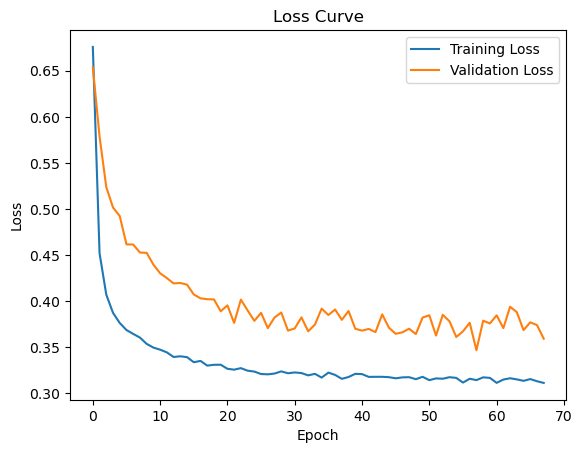

In [2542]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

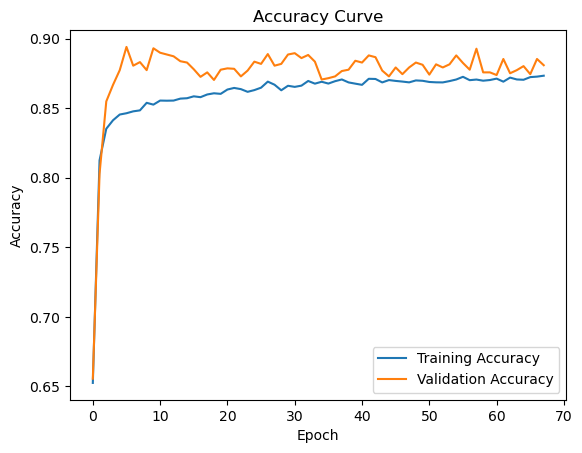

In [2543]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Over Sample

In [2544]:
model = Sequential([
    Dense(32 , kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(16),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(8),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

e:\APP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2545]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [2546]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [2547]:
print(Counter(y_train))

Counter({0: 21630, 1: 2747})


In [2548]:
ros=RandomOverSampler(sampling_strategy=0.5,random_state=42)
x_ove,y_ove=ros.fit_resample(x_train,y_train)

In [2549]:
print(Counter(y_ove))

Counter({0: 21630, 1: 10815})


In [2550]:
history = model.fit(x_ove, y_ove, epochs=100, 
                    batch_size=64 , validation_split=0.07, verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6436 - loss: 0.6795 - val_accuracy: 0.4943 - val_loss: 0.8787
Epoch 2/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7955 - loss: 0.4735 - val_accuracy: 0.6232 - val_loss: 0.8165
Epoch 3/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8246 - loss: 0.4169 - val_accuracy: 0.6981 - val_loss: 0.7679
Epoch 4/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8318 - loss: 0.3941 - val_accuracy: 0.7337 - val_loss: 0.7094
Epoch 5/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8358 - loss: 0.3839 - val_accuracy: 0.7676 - val_loss: 0.6830
Epoch 6/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8399 - loss: 0.3727 - val_accuracy: 0.7760 - val_loss: 0.6694
Epoch 7/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8421 - loss: 0.3672 - val_accuracy: 0.7949 - val_loss: 0.6480
Epoch 8/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8381 - loss: 0.3655 - val_accu

In [2551]:
loss, accuracy = model.evaluate(x_test, y_test)

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8609 - loss: 0.2652


In [2552]:
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 86.07%


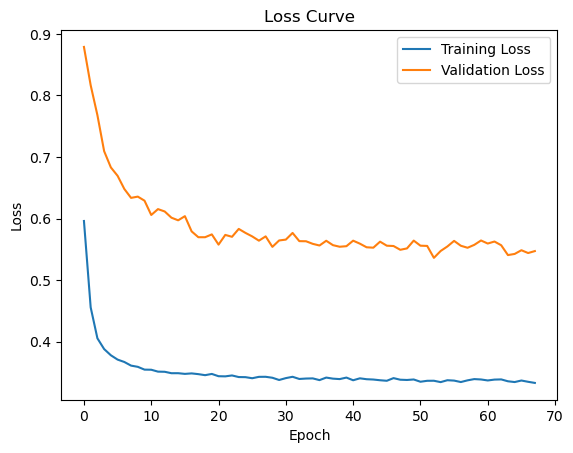

In [2553]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

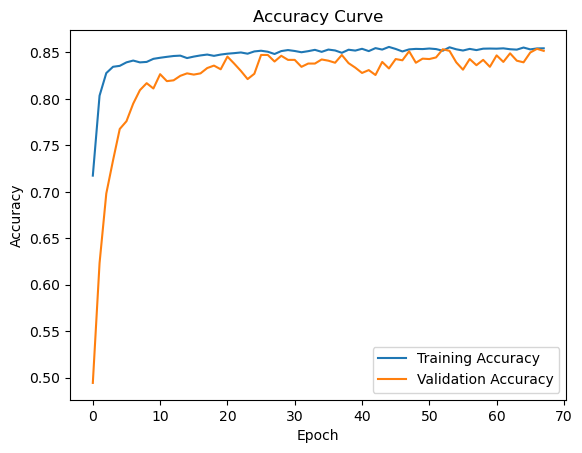

In [2554]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [2581]:
model = Sequential([
    Dense(32 , kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(16),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(8),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])



# model = Sequential([
#     Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
#     Dropout(0.5),
#     Dense(16, activation='relu'),
#     Dropout(0.5),
#     Dense(8, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

e:\APP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2582]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [2583]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

## Under Sample

In [2584]:
print(Counter(y_train))

Counter({0: 21630, 1: 2747})


In [2585]:
rus = RandomUnderSampler(sampling_strategy=0.6,random_state=42)
x_und, y_und = rus.fit_resample(x_train, y_train)

In [2586]:
print(Counter(y_und))

Counter({0: 4578, 1: 2747})


In [2587]:
history = model.fit(x_und, y_und, epochs=150, 
                    batch_size=32 , validation_split=0.08, verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5825 - loss: 0.7676 - val_accuracy: 0.3123 - val_loss: 0.8125
Epoch 2/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6889 - loss: 0.6466 - val_accuracy: 0.3993 - val_loss: 0.8191
Epoch 3/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7146 - loss: 0.6007 - val_accuracy: 0.5017 - val_loss: 0.8030
Epoch 4/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7539 - loss: 0.5329 - val_accuracy: 0.6331 - val_loss: 0.7569
Epoch 5/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7748 - loss: 0.4908 - val_accuracy: 0.6962 - val_loss: 0.7250
Epoch 6/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7946 - loss: 0.4639 - val_accuracy: 0.7235 - val_loss: 0.7088
Epoch 7/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.4362 - val_accuracy: 0.7662 - val_loss: 0.6695
Epoch 8/150
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8258 - loss: 0.4208 - val_accu

In [2588]:
loss, accuracy = model.evaluate(x_test, y_test)

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8542 - loss: 0.2848


In [2589]:
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 85.58%


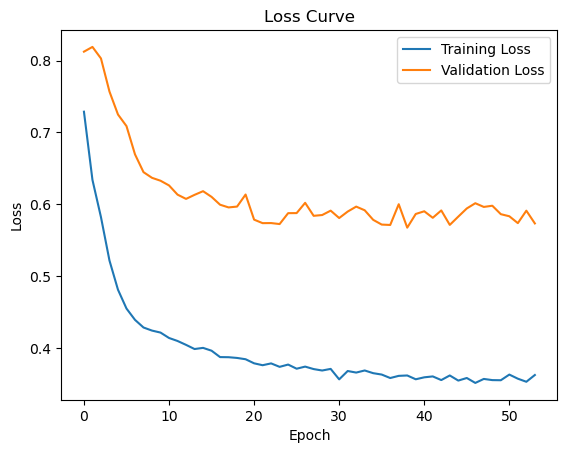

In [2590]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

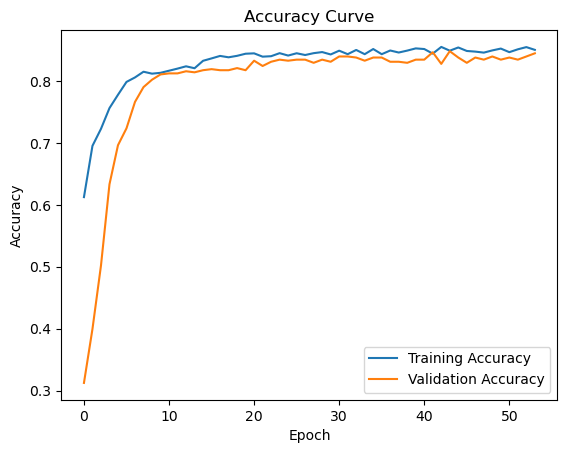

In [2591]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model first Models

In [2566]:
# Input Layer
inputs = Input(shape=(x_train.shape[1],))

In [2567]:
# # Fully Connected Layers
# x1 = Dense(32, activation='relu')(inputs)
# x11= Dropout(0.5)(x1)
# x2 = Dense(16,  activation='relu')(x11)
# x3 = Dropout(0.5)(x2)
# x4 = Dense(8, activation='relu')(x3)
# x44 = Dropout(0.5)(x4)


x1 = Dense(32)(inputs)               
x1 = BatchNormalization()(x1)       
x1 = Activation('relu')(x1)         
x1 = Dropout(0.5)(x1)

x2 = Dense(16)(x1)                  
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)
x2 = Dropout(0.5)(x2)

x4 = Dense(8)(x2)                   
x4 = BatchNormalization()(x4)
x4 = Activation('relu')(x4)
x4 = Dropout(0.5)(x4)

In [2568]:
# Output Layer
outputs = Dense(1, activation='sigmoid')(x4)

In [2569]:
model = Model(inputs, outputs)

In [2570]:
model.summary()

Model: "functional_137"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_138 (InputLayer)    │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_550 (Dense)               │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_273         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_273 (Activation)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_412 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_551 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_274         │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_274 (Activation)     │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_413 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_552 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_275         │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_275 (Activation)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_414 (Dropout)           │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_553 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,465 (9.63 KB)

 Trainable params: 2,353 (9.19 KB)

 Non-trainable params: 112 (448.00 B)

In [2571]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

In [2572]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [2573]:
print(Counter(y_train))

Counter({0: 21630, 1: 2747})


## SMOTE

In [2574]:
smote = SMOTE(sampling_strategy=0.5,random_state=42)
x_sm, y_sm = smote.fit_resample(x_train, y_train)

In [2575]:
print(Counter(y_sm))

Counter({0: 21630, 1: 10815})


In [2576]:
history = model.fit(x_sm, y_sm, epochs=100,
                    batch_size=64, validation_split=0.1, verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6306 - loss: 0.7055 - val_accuracy: 0.0197 - val_loss: 0.8892
Epoch 2/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7445 - loss: 0.5214 - val_accuracy: 0.0829 - val_loss: 0.8596
Epoch 3/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.4500 - val_accuracy: 0.6327 - val_loss: 0.7540
Epoch 4/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8012 - loss: 0.4055 - val_accuracy: 0.7658 - val_loss: 0.7039
Epoch 5/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.3878 - val_accuracy: 0.8025 - val_loss: 0.6867
Epoch 6/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.3774 - val_accuracy: 0.8308 - val_loss: 0.6550
Epoch 7/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8158 - loss: 0.3670 - val_accuracy: 0.8317 - val_loss: 0.6671
Epoch 8/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8207 - loss: 0.3646 - val_accu

In [2577]:
loss, accuracy = model.evaluate(x_test, y_test)

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8614 - loss: 0.2452


In [2578]:
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 86.62%


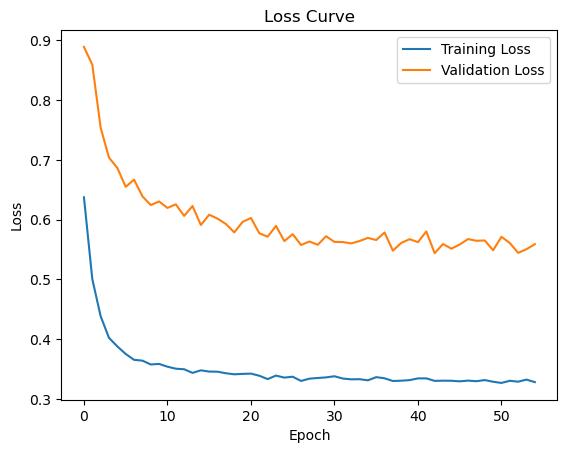

In [2579]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

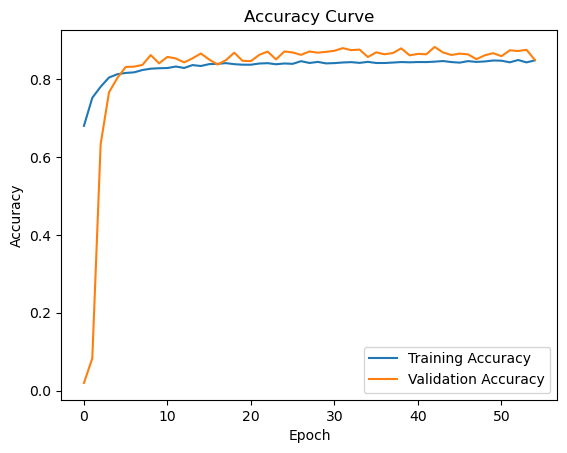

In [2580]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# and so on